# PCA (Principal Component Analysis) 主成分分析降维算法

## 降维技术
 - PCA（Principal Component Analysis）主成分分析。在PCA中，数据从原来的坐标系转换到了新的坐标第，新坐标系的选择是由数据本身决定的。第一个新坐标选择的是原始数据中 **方差** 最大的方向，第二个新坐标轴的选择和第一个坐标轴正交且具有最大方差的方向。该过程一直重复，重复次为原始数据中特征的数目。我们会发现大部分方差都包含在最前面的几个新坐标轴中。

 - FA (Factor Analysis)因子分析，在因子分析中，我们假设在观察数据的生成中有一些观察不到的 **隐变量** (latent variable)。假设观察数据是这些隐变量各某些噪声的线性组合。那么隐变量的数据可能比观察数据的数目少，也就是说通过找到隐变量就可以实现数据的降维。因子分析 已经应用于社会科学、金融和其他领域了。

 - ICA（Independent Component Analysis）独立成分分析。ICA假设数据是从N个数据源生成的，这一点和PCA有些类似。假设数据为多个数据源的混合观察结果，这些数据源之间在统计上是相互独立的，而PCA中只假设数据是不相关的。同PCA一样，如果数据源的数目少于观察数据的数目，则可以实现降维过程。
 
 - **注** PCA是目前应用最为广泛的

## 在Numpy中实现PCA
将数据转换成前N个主成分的步骤如下:
> * 去除平均值
> * 计算协方差矩阵
> * 计算协方差矩阵的特征值和特征向量
> * 将特征值从大到小排序
> * 保留最上面N个特征向量
> * 将数据转换以上述N个特征向量构建的新空间中

In [2]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
def loadDateSet(filename, delimeter='\t'):
    with open(filename) as fp:
        stringArr = [line.strip().split(delimeter) for line in fp.readlines()]
        datArra = [map(float, line) for line in stringArr]
        return mat(datArra)
    
def pca(dataMat, topNfeat=999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = cov(meanRemoved, rowvar=0)
    eigVals, eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:,eigValInd]
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat 

In [88]:
dataMat = loadDateSet('data/testSet.txt')
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [89]:
dataMat[:,0].flatten().A[0]

array([10.235186, 10.122339,  9.190236,  9.306371,  8.330131, 10.152785,
       10.40854 ,  9.003615,  9.534872,  9.498181,  9.875271, 10.362276,
       10.191204,  7.720499,  9.334379,  7.963186,  8.244973,  9.569196,
        8.854793,  9.382171,  8.179055,  8.267896,  9.047165,  8.741043,
        7.190216,  8.081227,  8.04746 ,  7.917584,  8.676942,  9.210251,
        7.732998,  7.681754,  7.925863,  8.261509,  8.514872, 10.32445 ,
        7.85671 ,  7.858608,  9.196808,  9.644415,  9.579833,  7.888484,
        9.072624,  8.914184,  7.822869, 10.538554,  8.280187,  8.884223,
        9.359927,  9.078611,  7.935134,  8.805945,  9.584316, 11.269714,
        9.120444,  7.97752 ,  8.104648,  8.617126,  9.033811,  8.32768 ,
        8.532272,  9.295434,  9.905202, 10.585764, 10.427584,  9.072767,
        9.164275,  9.746058,  9.286072,  8.188233,  7.948598,  7.56335 ,
        8.972405,  9.980868,  7.75349 ,  7.431143,  8.943403, 10.48189 ,
        9.150454,  8.123894,  8.626164,  7.354185, 

In [52]:
lowDMat, reconMat = pca(dataMat)

In [53]:
lowDMat

matrix([[-2.51033597,  0.15840394],
        [-2.86915379,  0.5092619 ],
        [ 0.09741085, -0.20728318],
        ...,
        [-0.50166225, -0.62056456],
        [-0.05898712, -0.02335614],
        [-0.18978714, -1.37276015]])

In [54]:
reconMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [55]:
shape(lowDMat)

(1000, 2)

In [56]:
shape(reconMat)

(1000, 2)

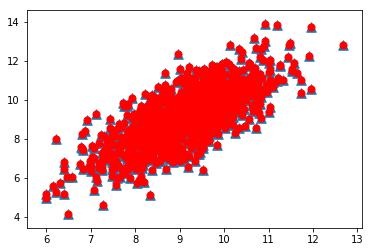

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=50, c='red')
plt.show()

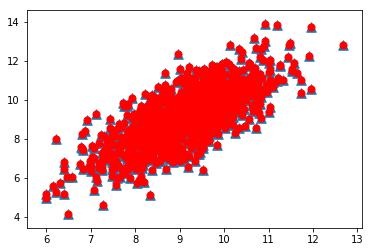

In [100]:
lowDMat, reconMat = pca(dataMat, 2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=50, c='red')
plt.show()